## 肘関節に関する力と力のモーメントのプログラム

Numpyを使って、下図のような上肢のモデルのシミュレーションをおこなうPython関数をプログラムしよう！プログラムに必要なNumpyモジュールとmatplotlibパッケージのpyplotモジュールについては、以下のリンク先のページをみてください：

<a href="./docs/appendix_numpy.html"><b>Numpyとmatplotlibの簡単公式</b></a>
<img src="./docs/arm.png">  

### ◾️パラメータ等
【調整可能パラメータ】 
- 体質量 : $w\ (\mathrm{kg})$
- 錘質量 : $M\ (\mathrm{kg})$
- 肘関節Oから錘の重心Qまでの距離 : OQ = $l\ (\mathrm{m})$  
- 肩関節屈曲角 : $\beta\ (\mathrm{degrees})$
- 肘関節屈曲角 : $\theta\ (\mathrm{degrees})\ (\theta>0)$
- 角条件 : $\beta\geq0^\circ,\ 10^\circ\leq\theta\leq135^\circ,\ \beta+\theta<180^\circ$

【与えられたまたは計算可能なパラメータ】 
- 前腕質量と手部の質量 : $m = 0.025w\ (\mathrm{kg})$
- 肘関節Oから前腕重心Gまでの距離 : OG = $h = 0.5l\ (\mathrm{m})$
- 肘関節Oから上腕筋の腱の装着部までの距離 : OP = $d=0.125l\ (\mathrm{m})$
- 重力加速度 : $g=9.8\ (\mathrm{m/s^2})$

【その他】
- 上腕筋の力$\bf{F}$は上腕と平行（すなわち，$\bf{F}$と鉛直のなす角は$\beta$）  

### ◾️計算式等

#### 1.  肘のまわりの外力のモーメントのz成分  

$M_{\mathrm{ex}} = -g(mh+Ml)\sin{(\beta+\theta)}$  

#### 2.  肘のまわりの上腕筋の力のモーメントのz成分

$M_z := M_{\mathrm{in}} = -M_{\mathrm{ex}}$

#### 3. 上腕筋の力の大きさ  

$F = -\frac{M_{\mathrm{ex}}}{d\sin{\theta}}=\frac{M_{\mathrm{in}}}{d\sin{\theta}}=\frac{M_{z}}{d\sin{\theta}}$

#### 4. 上腕筋の力のベクトルの成分

$F_{x} = -F\sin{\beta}$  
$F_{y} = F\cos{\beta}$

#### 5. 肘関節の抗力
$R_{x} = -F_{x}$  
$R_{y} = (m+M)g - F_{y}$

#### 6. 肘関節の抗力の大きさ  
$R = \sqrt{R_{x}^2+R_{y}^2}$


□１．以下のセルを実行してください。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class Elbow:
    def __init__(self, body_mass, forearm_length): #body_massは体質量，forearm_lengthは前腕の長さ
        self.g = 9.8 #重力加速度
        self.human_parameters = np.array([
            body_mass * 0.025,      #前腕と手の質量
            forearm_length * 0.125, #肘関節からの上腕筋の腱が付いている場所の距離
            forearm_length * 0.5,   #肘関節から前腕と手の重心までの距離
            forearm_length          #forearm_lengthは前腕の長さ
        ])

    def moment_z(self, load, beta, theta):
        m = self.human_parameters[0]
        h = self.human_parameters[2]
        l = self.human_parameters[3]
        M = load
        return self.g * (m*h + M*l) * np.sin(np.radians(beta) + np.radians(theta))

    def force_strength(self, load, beta, theta):
        d = self.human_parameters[1]
        return self.moment_z(load, beta, theta) / (d * np.sin(np.radians(theta)))

    def force_x(self, load, beta, theta):
        return -self.force_strength(load, beta, theta) * np.sin(np.radians(beta))

    def force_y(self, load, beta, theta):
        return self.force_strength(load, beta, theta) * np.cos(np.radians(beta))
    
    def resistance_x(self, load, beta, theta):
        return -self.force_x(load, beta, theta)

    def resistance_y(self, load, beta, theta):
        m = self.human_parameters[0]
        M = load
        return (m + M) * self.g - self.force_y(load, beta, theta)

    def resistance_strength(self, load, beta, theta):
        return np.sqrt(self.resistance_x(load, beta, theta)**2 + self.resistance_y(load, beta, theta)**2 )

def do_calc():
    w = float(input('体質量(kg)を入力してください: '))
    l = float(input('前腕長(m)を入力してください : '))
    load = float(input('錘質量(kg)を入力してください: '))
    beta = float(input('肩屈曲角(degrees)を入力してください: '))
    theta = float(input('肘屈曲角(degrees)を入力してください: '))
    if beta < 0 or theta < 10 or theta > 135 or (beta + theta) >= 180:
        print('計算ストップ：不正な角です')
    else:
        obj = Elbow(w, l)
        print('------------------')
        print('【シミュレーション結果】')
        print(f'肘関節モーメント : {obj.moment_z(load, beta, theta)} (Nm)')
        print(f'上腕筋の力の大きさ : {obj.force_strength(load, beta, theta)} (N)')
        print(f'肘関節抗力の大きさ : {obj.resistance_strength(load, beta, theta)} (N)')
        print(f'上腕筋の力のベクトル : {[obj.force_x(load, beta, theta), obj.force_y(load, beta, theta)]} (N)')
        print(f'肘関節抗力のベクトル : {[obj.resistance_x(load, beta, theta), obj.resistance_y(load, beta, theta)]} (N)')

def draw_effects():
    w = float(input('体質量(kg)を入力してください: '))
    l = float(input('前腕長(m)を入力してください : '))
    load = float(input('錘質量(kg)を入力してください: '))
    beta = float(input('肩屈曲角(degrees)を入力してください: '))
    obj = Elbow(w, l)
    if beta < 45:
        angles = np.arange(10, 136, 1)
    else:
        angles = np.arange(10, 180 - beta, 1)
    #肘関節モーメントのグラフ
    plt.figure()
    plt.plot(angles, obj.moment_z(load, beta, angles))
    plt.xlabel('Flection angles of elbow (degrees)')
    plt.ylabel('Moment of force around elbow (Nm)')
    #前腕筋力のグラフ
    plt.figure()
    plt.plot(angles, obj.force_strength(load, beta, angles), label = 'strength')
    plt.plot(angles, obj.force_x(load, beta, angles), label = 'x-component')
    plt.plot(angles, obj.force_y(load, beta, angles), label = 'y-component')
    plt.legend()
    plt.xlabel('Flection angles of elbow (degrees)')
    plt.ylabel('Force of forearm mascle (N)')
    #肘関節筋力のグラフ
    plt.figure()
    plt.plot(angles, obj.resistance_strength(load, beta, angles), label = 'strength')
    plt.plot(angles, obj.resistance_x(load, beta, angles), label = 'x-component')
    plt.plot(angles, obj.resistance_y(load, beta, angles), label = 'y-component')
    plt.legend()
    plt.xlabel('Flection angles of elbow (degrees)')
    plt.ylabel('Resistance of elbow (N)')

In [2]:
do_calc()

体質量(kg)を入力してください: 60
前腕長(m)を入力してください : .41
錘質量(kg)を入力してください: 5
肩屈曲角(degrees)を入力してください: 25
肘屈曲角(degrees)を入力してください: 60
------------------
【シミュレーション結果】
肘関節モーメント : 23.015584207362643 (Nm)
上腕筋の力の大きさ : 518.5581946410663 (N)
肘関節抗力の大きさ : 461.6120546610976 (N)
上腕筋の力のベクトル : [-219.15216283060272, 469.97332983486518] (N)
肘関節抗力のベクトル : [219.15216283060272, -406.27332983486519] (N)


体質量(kg)を入力してください: 60
前腕長(m)を入力してください : .41
錘質量(kg)を入力してください: 5
肩屈曲角(degrees)を入力してください: 25


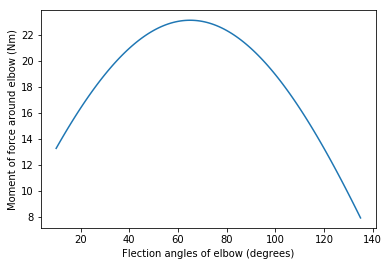

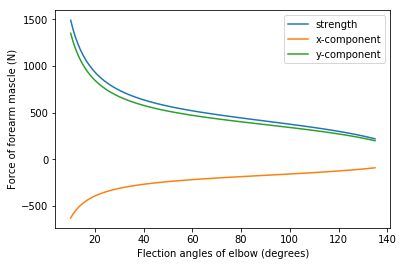

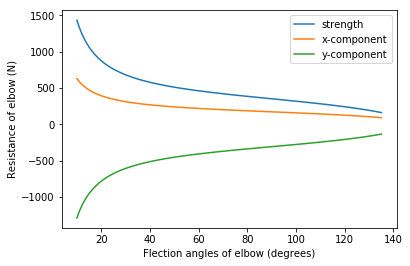

In [3]:
draw_effects()